In [45]:
using CSV, DataFrames, StatsBase, Graphs, SparseArrays, Distances, GraphPlot, Plots, SimpleWeightedGraphs, Cairo, Compose, MetaGraphs, OrderedCollections

In [4]:
if !isfile("coremof.csv")
	download("https://zenodo.org/record/3370144/files/2019-07-01-ASR-public_12020.csv?download=1", "coremof.csv")
end

"coremof.csv"

In [35]:
mof = CSV.File("data_paper/features_labels/full_CoRE2019_alldata.csv") |> DataFrame
selection = ["MOFname", "Df", "Di", "Dif", "density [g/cm^3]", "total_SA_volumetric", "total_SA_gravimetric", "total_POV_volumetric", "total_POV_gravimetric"]
rename_fields = [:Di,:Df,:Dif,:ρ,:VSA,:GSA,:VPOV,:GPOV]
sel_fields = mof[!,selection]
nmof = map(eachcol(sel_fields[!,2:end])) do col
	(col .- minimum(col))./(maximum(col)  - minimum(col))
end |> arr -> DataFrame(arr, rename_fields)
idx = sample(1:size(nmof)[1], 1000)
X =nmof[idx,:] |> Matrix{Float64};
Xf = nmof |> Matrix{Float64}
labels = sel_fields[idx,1];

## Distancia entre nodos


In [9]:
dist = CosineDist()
R = pairwise(dist, X, dims=1)
R = map( f -> f > 0.8 ? f : 0, R )
# A = max.(R,R')

1000×1000 Matrix{Real}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮        ⋱        ⋮              ⋮           
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0   

In [37]:
g = SimpleWeightedGraph(R)
vertices(g)

1:1000

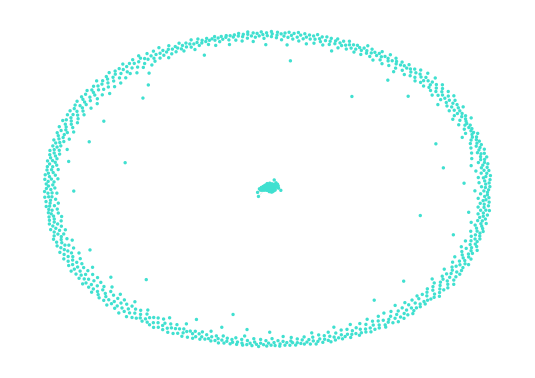

In [38]:
gp = gplot(g, layout = spring_layout)
# draw(PNG("mof.png"),gp)

In [41]:
non_null_deg_cen = Dict()
degree_centrality = Dict( labels[vertex] => length(neighbors(g,vertex))/999 for vertex in vertices(g))
for (k,v) in pairs(degree_centrality)
	if v != 0 
		non_null_deg_cen[k] = v
	end
end
non_null_deg_cen

Dict{Any, Any} with 117 entries:
  "LAZJAZ_SL"      => 0.034034
  "BASJUB_clean"   => 0.00800801
  "GOGWEF_clean"   => 0.028028
  "YAQZUN_clean"   => 0.029029
  "BEXREC_clean"   => 0.01001
  "NIHBIQ02_clean" => 0.028028
  "KIJRUS_clean"   => 0.011011
  "FOHCIP_clean"   => 0.0940941
  "FAWCEN02_SL"    => 0.032032
  "AFOVAT_clean"   => 0.01001
  "SIVQAR_clean"   => 0.033033
  "LASWEJ_clean"   => 0.00500501
  "YEGKOM_clean"   => 0.01001
  "GERNOI_clean"   => 0.019019
  "CICPAH_clean"   => 0.00900901
  "FAVGOB_clean"   => 0.027027
  "NARPOO_clean"   => 0.033033
  "DAFTIQ_clean"   => 0.025025
  "PAQJUM_clean"   => 0.004004
  ⋮                => ⋮

In [54]:
non_null_deg = Dict()
degrees = Dict( labels[vertex] => length(neighbors(g,vertex)) for vertex in vertices(g))
for (k,v) in pairs(degrees)
	if v != 0 
		non_null_deg[k] = v
	end
end
degrees = OrderedDict(degrees)

OrderedDict{String, Int64} with 948 entries:
  "MAYJOM_clean"                     => 0
  "BOZZOH_clean"                     => 0
  "NUHRAL_clean"                     => 0
  "CAZFOA_clean"                     => 0
  "EMUBOF_clean"                     => 0
  "COKPID_clean"                     => 0
  "QEZZIF_clean"                     => 0
  "ic060030osi20060309_091447_clean" => 0
  "FEYDET_clean"                     => 0
  "XIHSAJ01_clean"                   => 0
  "YUKTUU_clean"                     => 0
  "JAFPIQ_clean"                     => 0
  "RICBEM_clean"                     => 0
  "ja102862j_si_005_clean"           => 0
  "AGAYIQ_clean"                     => 0
  "QOFDIA01_clean"                   => 0
  "OVEJIJ_clean"                     => 0
  "NOFRAC_clean"                     => 0
  "ONAWEG02_clean"                   => 0
  ⋮                                  => ⋮

In [ ]:
data = Dict(
	"degree" => [],
	"degree_centrality" => []
)
for key in keys(degrees)
	push!(data["degree"], degrees[key])
	push!(data["degree_centrality"], degree_centrality[key])
end
